# 数据清洗整理分析
细沙堆成山，滴水流成河。前面我们已经学习了数据分析江湖的Python技能，现在是时候身入江湖了，检验一下我们是否掌握了Python数据分析的技能。
![](./picture/15-1.png)
一个专业的数据分析，他的定位应该是一个“谋士”，所谓谋士，应该运筹帷幄，决胜千里，不出五尺书堂，便知天下大势。  
由于，我们现在已经从IT（Information Technology）时代进入了DT（Data Technology）时代。我们有能力低成本的收集和存储大量的数据，从而衍生出数据分析这个行业。  
据分析最重要的作用是从数据里面寻求真正有价值的信息，并帮助我们作出合理的决策。  
为了更好的了解数据分析师这个岗位，本节课我们将以某招聘网站的2017年数据分析师职位数据为基础，进行数据分析。数据路径为：/data/analyse_spider.csv。  
下面，我们了解一下数据的基本信息：  
数据共包含14列，先看一下每一列的含义：  
参数含义  
city：城市  
companyId：公司ID  
companySize：公司大小  
CbusinessZones：公司所在商区  
firstType：职位所属一级类目  
secondType：职业所属二级类目  
education：教育要求  
industryField：公司所属领域  
positionId：职位ID  
positionAdvantage：职位福利  
positionName：职位名称  
salary：薪水  
workYear：工作年限要求  
运行下方代码，查看数据的具体情况：  

In [2]:
import pandas as pd  
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')  
print(data.shape)  
data.info()  

(6876, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               6876 non-null   object
 1   companyId          6876 non-null   int64 
 2   companySize        6876 non-null   object
 3   businessZones      6876 non-null   object
 4   firstType          6876 non-null   object
 5   secondType         6876 non-null   object
 6   education          6876 non-null   object
 7   industryField      6876 non-null   object
 8   positionId         6876 non-null   object
 9   positionAdvantage  6876 non-null   object
 10  positionName       6876 non-null   object
 11  positionLables     6875 non-null   object
 12  salary             6876 non-null   object
 13  workYear           6876 non-null   object
 14  Unnamed: 14        6742 non-null   object
 15  Unnamed: 15        6345 non-null   object
 16  Unnamed: 16        5446 non-nul

因为csv文件中带有中文字符而产生字符编码错误，造成读取文件错误，在这个时候，我们可以尝试将pd.read_csv()函数的encoding参数设置为"gbk"。  
## 分析内容
数据分析的大忌是不知道分析方向和目的，拿着一堆数据不知所措。一切数据分析都是以业务为核心目的，而不是以数据为目的。   
所以，我们应该先定分析的目标，然后在处理数据。  
我们本案例的目标很简单，就是根据该数据，分析影响薪资的因素：  
1. 地区对数据分析师的薪酬的影响； 
2. 学历对数据分析师的薪酬的影响；   
3. 工作年限对数据分析师的薪酬的影响。  
有了目标和方向后，后面就是将目标拆解为实际过程。  
数据的缺失值在很大程度上会影响数据的分析结果，如果某一个字段缺失值超过一半的时候，我们就可以将这个字段删除了，因为缺失过多就没有业务意义了。  
注意：并不是，只要含有有缺失值的时候，我们就要将数据删除，如果数据量比较少、缺失值不多，并且对我们的分析指标没有实际影响时，我们就可以将其保留。  
运行下方代码，查看数据的缺失值情况：  

In [4]:
import pandas as pd
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
print(data.shape)
data.info()

(6876, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               6876 non-null   object
 1   companyId          6876 non-null   int64 
 2   companySize        6876 non-null   object
 3   businessZones      6876 non-null   object
 4   firstType          6876 non-null   object
 5   secondType         6876 non-null   object
 6   education          6876 non-null   object
 7   industryField      6876 non-null   object
 8   positionId         6876 non-null   object
 9   positionAdvantage  6876 non-null   object
 10  positionName       6876 non-null   object
 11  positionLables     6875 non-null   object
 12  salary             6876 non-null   object
 13  workYear           6876 non-null   object
 14  Unnamed: 14        6742 non-null   object
 15  Unnamed: 15        6345 non-null   object
 16  Unnamed: 16        5446 non-nul

为了方便大家更好的理解，我们将结果提炼出来，如下图：  
![](./picture/15-3.png)
通过结果我们可以看出：一共有6876个数据，其中businessZones、firstType、secondType，positionLables都存在为空的情况。companyId和positionId为数字，其他都是字符串。  
从数量上可以看出，businessZones列的数据缺失量比较大，需要将该列数据删除。  
其他三列的缺失值的总数量为45，并不会影响整体分析效果，我们可以删除这45条数据。  
运行下面代码，删除缺失值：  

In [7]:
import pandas as pd
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
# 删除businessZones列数据
data.drop(['businessZones'],axis=1, inplace=True)
# 删除含有NaN的数据
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3087 to 6874
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               4 non-null      object
 1   companyId          4 non-null      int64 
 2   companySize        4 non-null      object
 3   firstType          4 non-null      object
 4   secondType         4 non-null      object
 5   education          4 non-null      object
 6   industryField      4 non-null      object
 7   positionId         4 non-null      object
 8   positionAdvantage  4 non-null      object
 9   positionName       4 non-null      object
 10  positionLables     4 non-null      object
 11  salary             4 non-null      object
 12  workYear           4 non-null      object
 13  Unnamed: 14        4 non-null      object
 14  Unnamed: 15        4 non-null      object
 15  Unnamed: 16        4 non-null      object
 16  Unnamed: 17        4 non-null      object


处理完空值之后，数据还剩6837条，13列。  
处理完空值以后，我们还需要注意另外一个会影响我们分析结果的因素，就是重复值。  
我们来看一下计算一下重复的数据，并将其删除。  
使用data.duplicated()方法判断每一行是否重复，然后使用data.duplicated()[data.duplicated()==True]取出重复行，最后使用len()计算重复的数据。  
下面运行下方代码，看一下是否有重复的数据，并删除。  


In [9]:
import pandas as pd
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
# 删除businessZones列数据
data.drop(['businessZones'],axis=1, inplace=True)
data.dropna(inplace=True)

# 计算重复的数据数
print(len(data.duplicated()[data.duplicated()==True]))
# 删除重复数据
data.drop_duplicates(inplace=True)
data.info()

2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 3087 to 3829
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               2 non-null      object
 1   companyId          2 non-null      int64 
 2   companySize        2 non-null      object
 3   firstType          2 non-null      object
 4   secondType         2 non-null      object
 5   education          2 non-null      object
 6   industryField      2 non-null      object
 7   positionId         2 non-null      object
 8   positionAdvantage  2 non-null      object
 9   positionName       2 non-null      object
 10  positionLables     2 non-null      object
 11  salary             2 non-null      object
 12  workYear           2 non-null      object
 13  Unnamed: 14        2 non-null      object
 14  Unnamed: 15        2 non-null      object
 15  Unnamed: 16        2 non-null      object
 16  Unnamed: 17        2 non-null      objec

共有1830条重复的数据，使用data.drop_duplicates()删除后，还剩5000多条数据。  
## 整理数据和分析
数据的缺失值和重复值，是我们在分析之前必须要做，因为，他们的存在会很大程度上影响我们的分析结果。  
接下来，我们需要做的事情就是，根据我们的分析需求去整理目标数据，从而方便我们的分析。  
我们的第一个任务是薪酬分布情况，所以我们先来整理这个数据。  
![](./picture/15-4.png)
薪资字段格式基本分为15k-25k和15k以上这两种，并且都是字符串。  
如果我们只想要薪资下限数据或者薪资上限数据时，怎么办呢？  
最好的方式就将salary薪资字段按照最高薪水和最低薪水拆成两列，并且薪水的话如果用几K表示，直接用于计算，所以将k去掉。  
这里我们可以使用pandas中的apply方法，针对薪酬这一列数据进行操作，结果如下图。  
![](./picture/15-5.png)
下面是拆分的具体代码：


In [ ]:
# 定义拆分的函数
def split_salary(salary,method):
    # 获取'-'索引值
    position = salary.upper().find('-')
    if position != -1: #salary值是15k-25k形式
        low_salary = salary[:position-1]
        high_salary= salary[position+1:len(salary)-1]
         
    else: #salary值是15k以上形式
        low_salary = salary[:salary.upper().find('K')]
        high_salary= low_salary
    # 根据参数用以判断返回的值
    if method == 'low':
        return low_salary
    elif method == 'high':
        return high_salary   
    elif method == 'avg':
        return (int(low_salary) + int(high_salary))/2
# 赋值
data['low_salary']=data.salary.apply(split_salary,method='low')
data['high_salary']=data.salary.apply(split_salary,method='high')
data['avg_salary']=data.salary.apply(split_salary,method='avg')
data

下面我们具体分析一下代码的逻辑。  
第一步，我们自定义了一个函数split_salary()函数，salary参数是使用apply函数必须要传的参数，其实就是data.salary的值。  
第二步，使用salary.upper().find('-')判断salary值是15k-25k的形式还是15k以上形式，如果结果是-1，表示是15k以上  形式，反之是15k-25k形式。为了避免k的大小写，我们用upper函数将k都转换为K，然后以K作为截取。
第三步，在split_salary函数增加了新的参数用以判断返回low_salary还是high_salary或者是avg_salary。  
赋值上面的代码到代码框运行，查看拆分结果:  

In [11]:
import pandas as pd
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
# 删除businessZones列数据
data.drop(['businessZones'],axis=1, inplace=True)
data.dropna(inplace=True)

# 计算重复的数据数
print(len(data.duplicated()[data.duplicated()==True]))
# 删除重复数据
data.drop_duplicates(inplace=True)
data.info()

2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 3087 to 3829
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               2 non-null      object
 1   companyId          2 non-null      int64 
 2   companySize        2 non-null      object
 3   firstType          2 non-null      object
 4   secondType         2 non-null      object
 5   education          2 non-null      object
 6   industryField      2 non-null      object
 7   positionId         2 non-null      object
 8   positionAdvantage  2 non-null      object
 9   positionName       2 non-null      object
 10  positionLables     2 non-null      object
 11  salary             2 non-null      object
 12  workYear           2 non-null      object
 13  Unnamed: 14        2 non-null      object
 14  Unnamed: 15        2 non-null      object
 15  Unnamed: 16        2 non-null      object
 16  Unnamed: 17        2 non-null      objec

到此，我们数据整理部分完成，接下来我们看一下数据分析师的薪酬情况。  
现在我们看一下，数据分析师薪资的分布情况。  
代码片段  
```
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')
plt.hist(data.avg_salary)
plt.show()
```
![](./picture/15-6.png)
图表中绘制了数据分析师薪资的分布，可以看出薪资的大部分在10k-30k之间，10k-20k这个范围最多。  
现在观察不同城市、不同学历以及不同工作年限对薪资的影响。  
首先，我们先按城市分组，然后对比每个城市的平均薪资。  

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')
sns.set(style='dark')

data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
# 删除businessZones列数据
data.drop(['businessZones'],axis=1, inplace=True)
data.dropna(inplace=True)
groups = data.groupby(by='city')
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())
plt.xticks(xticks,fontproperties=my_font)  
plt.show()

AttributeError: 'DataFrame' object has no attribute 'avg_salary'

![](./picture/15-6.png)
代码中我们用city进行分组，然后分别绘制了每个城市的平均薪资。  
从图表中我们看出，北京的数据分析师薪资高于其他城市，上海和深圳稍次，广州甚至不如杭州和苏州。  
接下来，我们再看看不同学历对薪资的影响。  
我们同样按学历进行分组，然后对比不同学历的平均薪资。  

In [15]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')
sns.set(style='dark')
groups = data.groupby(by='education')
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())
plt.xticks(xticks,fontproperties=my_font)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'avg_salary'

![](./picture/15-7.png)
代码中我们用city进行分组，然后分别绘制了不同学历的平均薪资。  
从图表中我们看出,博士薪资最高，硕士和本科基本持平，大专学历稍有弱势。  
最后，我们再看看不同工作年限对薪资的影响。  
我们同样按工作年年限进行分组，然后对比不同年限的平均薪资。  

In [16]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf')
sns.set(style='dark')
groups = data.groupby(by='workYear')
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())

plt.xticks(xticks,fontproperties=my_font)
    
plt.show()

AttributeError: 'DataFrame' object has no attribute 'avg_salary'

![](./picture/15-8.png)
从图表中我们看出，拥有10年以上的数据分析工作经验的人平均薪资最高，并且是年限越长薪资就越高。  
分别拷贝上面的代码运行，查看图表绘制：  

In [17]:
import pandas as pd
data = pd.read_csv('./data/analyse_spider.csv',encoding='GBK')
# 删除businessZones列数据
data.drop(['businessZones'],axis=1, inplace=True)
data.dropna(inplace=True)

# 删除重复数据
data.drop_duplicates(inplace=True)

# 定义拆分的函数
def split_salary(salary,method):
    # 获取'-'索引值
    position = salary.upper().find('-')
    if position != -1: #salary值是15k-25k形式
        low_salary = salary[:position-1]
        high_salary= salary[position+1:len(salary)-1]
         
    else: #salary值是15k以上形式
        low_salary = salary[:salary.upper().find('K')]
        high_salary= low_salary
    # 根据参数用以判断返回的值
    if method == 'low':
        return low_salary
    elif method == 'high':
        return high_salary   
    elif method == 'avg':
        return (int(low_salary) + int(high_salary))/2
# 赋值
data['low_salary']=data.salary.apply(split_salary,method='low').astype('int')
data['high_salary']=data.salary.apply(split_salary,method='high').astype('int')
data['avg_salary']=data.salary.apply(split_salary,method='avg')

# 复制代码，并运行

ValueError: invalid literal for int() with base 10: '技能培'

薪资我们就简单的分析到这里，我们简单的归纳一下我们数据展现的结果：  
1.数据分析师的薪资的平均数是17k，最大薪资在75k，大部分分析师薪资在10k-20k之间。  
2.北京的数据分析师薪资高于其他城市，上海和深圳稍次，杭州和苏州已经超过广州。  
3.薪资最高的是博士，硕士和本科的薪资基本持平，大专学历稍有弱势。  
4.工作年限越长，薪资就越高。  
根据上面数据展现的结果可以得到这样的结论：北上广深依然是我们高薪就业地，同时工作年限和学历都是都与薪资成线性增长趋势。  
## 本节总结  
本案例采用的是2017年的数据，分析的结果与当下数据分析师的实际薪酬有一定的差异。  
本案例的目的是让大家更好的了解数据分析，以及数据分析的基本流程，最终结论仅供参考。  
如果想要更深的挖掘数据中信息，我们还需要学习更多的挖掘以及统计学的相关知识。  
## 下节预告
![](./picture/15-9.png)

## 题目要求
本练习我们使用是2019年全年的天气数据，，数据路径为/data/BJ_tianqi,本数据共有365行、7列。
## 题目讲解
现在根据上面的数据完成如下需求： 
1. 2019年北京哪个月的气温波动最大？   
2. 2019年各种空气质量的占比是多少？   
思路： 2019年北京哪个月的气温波动最大：   
（1）根据月份进行分组   
（2）计算每个组的温度极差（本月最高温度减去最低温度）   
（3）比较极差的大小； 2019年各种空气质量的占比是多少：   
（1）空气质量的占比我们可以根据空气质量列进行分组；   
（2）获取空气质量的种类和数量；   
（3）绘制饼图
## 书写代码

(365, 7)
         最高温度  最低温度  极差
月份                     
2019-08    33    18  15
2019-06    36    18  18
2019-07    38    19  19
2019-01    10   -10  20
2019-09    35    14  21
2019-02    14    -8  22
2019-12    10   -12  22
2019-11    18    -6  24
2019-04    28     2  26
2019-03    25    -2  27
2019-05    37    10  27
2019-10    30     2  28


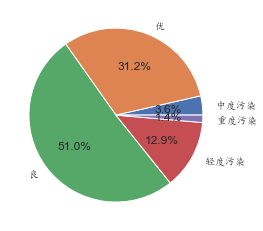

In [22]:
import pandas as pd

# 2019年北京哪个月的气温波动最大
# （1）根据月份进行分组
# （2）计算每个组的温度极差（本月最高温度减去最低温度）
# （3）比较极差的大小
# 第一步： 处理数据
# 在读取日期的时候，利用parse_dates()方法将“日期”这列数据类型转换成datetime类型，这样方便我们可以根据时间获取数据
df = pd.read_csv('./data/BJ_tianqi.csv',parse_dates=['日期'])
print(df.shape)
# 由于最高温度和最低温度两列数据类型都是带有"℃"符号的字符串，方便计算我需要去除“℃”，并将数据类型转化成int
df["最高温度"] = df["最高温度"].str.replace("℃", "").astype('int')
df["最低温度"] = df["最低温度"].str.replace("℃", "").astype('int')

# 方便分组计算，我们可以添加月份列
df['月份'] = df['日期'].dt.to_period("M")

# 根据月份分组，并计算每个组的极差值
dict1 = {
    "最高温度":'max',
    "最低温度":'min'
}  
df_group = df.groupby(by='月份').agg(dict1)

# 计算每个月气温波动并，添加一列
df_group['极差'] = df_group['最高温度']-df_group['最低温度']
# # 根据极差进行排序
result = df_group.sort_values('极差')
print(result)
# 根据结果我们可以发现，2019年中3、4、5、10月份的气温波动都是比较大，温差比较大，请注意添减衣服，不要感冒呦。


# 2019年各种空气质量的占比是多少
# 空气质量的占比我们可以根据空气质量列进行分组
group_count = df.groupby(by='空气质量').count()
# 获取空气质量的种类
aqi_type = group_count.index.tolist()
# 获取每个种类的数量,可以获取分组后任何的一列数据即可
type_count = group_count['日期'].values.tolist()
# 根据数据绘制饼图
import matplotlib.pyplot as plt
from matplotlib import font_manager
my_font = font_manager.FontProperties(fname='./data/simkai.ttf',size=10)
patches, l_text, p_text=plt.pie(type_count,labels=aqi_type,autopct="%1.1f%%",)
for t in l_text: 
    t.set_fontproperties(my_font)
plt.show()